In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.signal import welch

In [2]:
# Definisci i parametri del segnale
sampling_rate = 204800                          # Frequenza di campionamento in Hz (modifica se necessario)
nperseg = 16384                                 # Numero di campioni per segmento della Welch
filename = "Channel1.csv"
file_path = os.path.join("../timeseries/B101", filename)

In [3]:
# Caricare il file CSV
data = pd.read_csv(file_path)
pressure_data = data["singleData"].values
pressure_data

array([-21702628. ,  -8657071. ,   7671702. , ...,  -7847381.5,
        24490868. ,  41916832. ])

In [4]:
# Calcolo dello spettro di potenza con la funzione di Welch
frequencies, power_spectrum = welch(pressure_data, fs=sampling_rate, nperseg=nperseg)

In [5]:
# Convertire lo spettro di potenza in dB re: 1 µbar (normalizzazione)
power_spectrum_db = 10 * np.log10(power_spectrum / (1e-6)**2)
# Convertire lo spettro di potenza in dB re: 1 (normalizzazione tra -1 e 1)
power_spectrum_db = 10 * np.log10(power_spectrum)

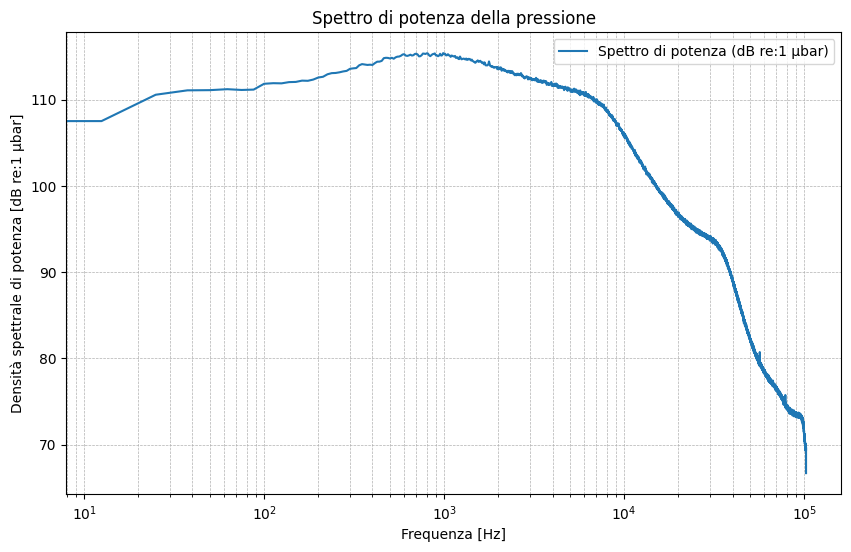

In [6]:
# Plot dello spettro di potenza in dB re: 1 µbar
plt.figure(figsize=(10,6))
plt.semilogx(frequencies, power_spectrum_db, label="Spettro di potenza (dB re:1 µbar)")
plt.xlabel("Frequenza [Hz]")
plt.ylabel("Densità spettrale di potenza [dB re:1 µbar]")
plt.title("Spettro di potenza della pressione")
plt.grid(which='both', linestyle='--', linewidth=0.5)
plt.legend()
plt.show()